# Predicting Online Shoppers Behaviors
By: Robert Russ

# Origins of Dataset
I will use the dataset from C. Okan Sakar and Yomi Kastro paper who extracted the data with the company’s permission from www.gozalangroup.com.tr/.  I originally found this dataset on www.kaggle.com (https://www.kaggle.com/roshansharma/online-shoppers-intention) named ‘Online Shopper’s Intention’.  I investigated this dataset further and learned it was derived from https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset.  

I wanted to learn more about the dataset and found the academic paper written about the data entitled, “Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks” by C. Okan Sakar, S. Olcay Polat, Mete Katircioglu, and Yomi Kastro.  

# Dataset Description
The dataset consists of 12,330 customer sessions (rows), 10 numerical and 8 categorical variables (columns).  I will use ‘Revenue’ (True or False) variable as my target variable.  The other 17 variables will be my predictor variables, customer's attributes, or features.  I will engineer more attributes before modeling.  This dataset was formed in a one-year period not including holidays, special days, or specific campaigns.  The size of the data set is adequate for the data science tasks I plan on performing on it.  

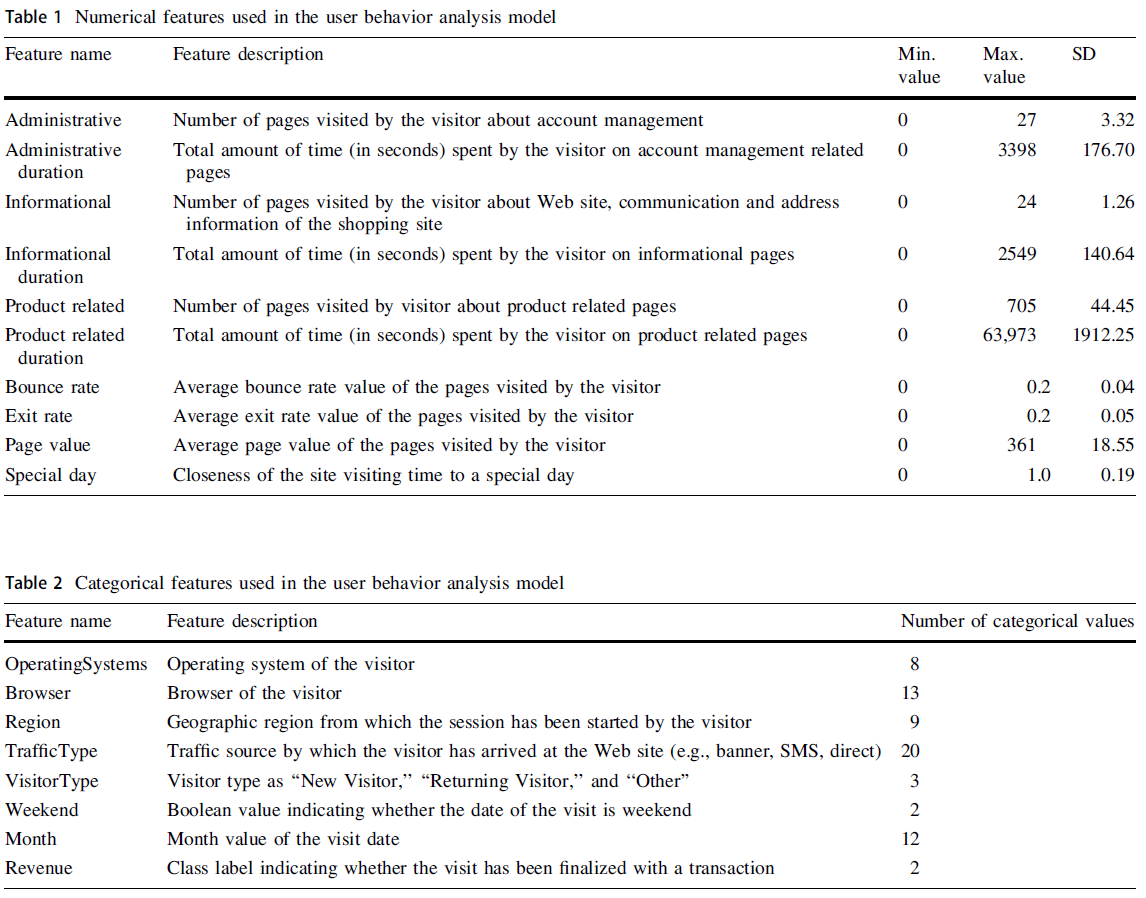

References:

Jcharis. Machine-Learning-Web-Apps. (2018). Retrived from:
https://github.com/Jcharis/Machine-Learning-Web-Apps/tree/master/Deploying%20ML%20Flask%20App%20to%20GCP

Rathor, A. Productionalize Your Machine Learning Model Using Flask And Google App Engine. (2019). Retrieved from:
https://towardsdatascience.com/productionalize-your-machine-learning-model-using-flask-and-google-app-engine-594896714d69

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2019) 31: 6893. https://doi.org/10.1007/s00521-018-3523-0

# Loading Libraries

In [23]:
# Load Python libraries for visualizing data.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [13]:
# Data is stored on and retrieved from BigQuery on Google Cloud Platform.
"""
query =
SELECT *
FROM online_shoppers_intention.ECommerce

from google.cloud import bigquery
online_df = bigquery.Client().query(query).to_dataframe()
""" 
import pandas as pd

online_df = pd.read_csv('online_shoppers_intention.csv')
online_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Inspection

In [14]:
# Display the shape of the dataset.
online_df.shape

(12330, 18)

In [15]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [16]:
# Display na or nan values.
online_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [17]:
# Display descriptive statistics.
online_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330.0,NaN,NaN,NaN,2.315166,3.321784,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12330.0,NaN,NaN,NaN,80.818611,176.779107,0.0,0.0,7.5,93.25625,3398.75
Informational,12330.0,NaN,NaN,NaN,0.503569,1.270156,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12330.0,NaN,NaN,NaN,34.472398,140.749294,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12330.0,NaN,NaN,NaN,31.731468,44.475503,0.0,7.0,18.0,38.0,705.0
ProductRelated_Duration,12330.0,NaN,NaN,NaN,1194.74622,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223
BounceRates,12330.0,NaN,NaN,NaN,0.022191,0.048488,0.0,0.0,0.003112,0.016813,0.2
ExitRates,12330.0,NaN,NaN,NaN,0.043073,0.048597,0.0,0.014286,0.025156,0.05,0.2
PageValues,12330.0,NaN,NaN,NaN,5.889258,18.568437,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12330.0,NaN,NaN,NaN,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0


In [18]:
# Manipulate the column datatypes.  
online_df['OperatingSystems'] = online_df['OperatingSystems'].astype('str')
online_df['Browser'] = online_df['Browser'].astype('str')
online_df['Region'] = online_df['Region'].astype('str')
online_df['TrafficType'] = online_df['TrafficType'].astype('str')

# Convert dtype from boolean to string.
online_df['Weekend'] = online_df['Weekend'].astype('str')
online_df['Revenue'] = online_df['Revenue'].astype('str')

In [19]:
# Verifying the data types changed.
online_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
Revenue                     object
dtype: object

# Target Variable Analysis

In [20]:
# Display value count of target variable.
online_df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [21]:
# Percent breakdown of the Revenue rates.
online_rate = online_df['Revenue'].value_counts()/online_df.shape[0]
print(online_rate)

Revenue
False    0.845255
True     0.154745
Name: count, dtype: float64


In [24]:
# Create bar graph of the Revenue.
sns.countplot('Revenue', data = online_df)
plt.xlabel('Purchased or Not')
plt.ylabel('Total number of Customer Sessions')
plt.title('Total Number Customers Purchased (false=0 and true=1) Bar Graph')
plt.show()

TypeError: countplot() got multiple values for argument 'data'

There is a clear imbalance in the classes of the target variable.  While evaluating the machine learning models, I will chooose the appropriate metrics to select the appropriate classification model.

# EDA

In [25]:
# Create dataframe for categorical variables.
cat_df = [f for f in online_df.columns if online_df.dtypes[f] == 'object']
cat_df = online_df[cat_df]

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/1614162406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind')


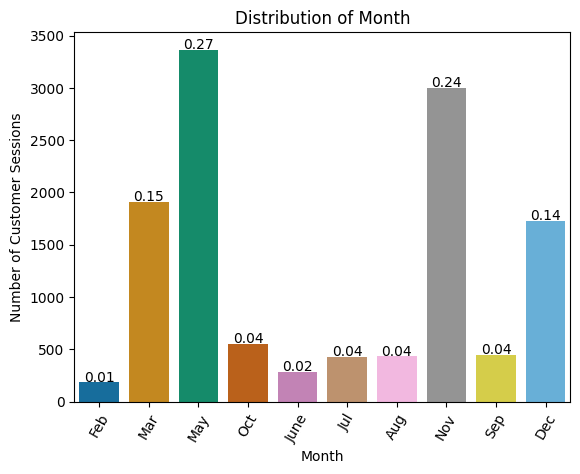

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/1614162406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind')


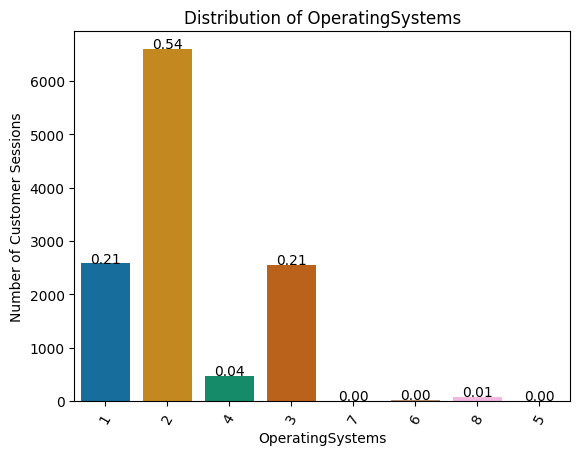

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/1614162406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind')


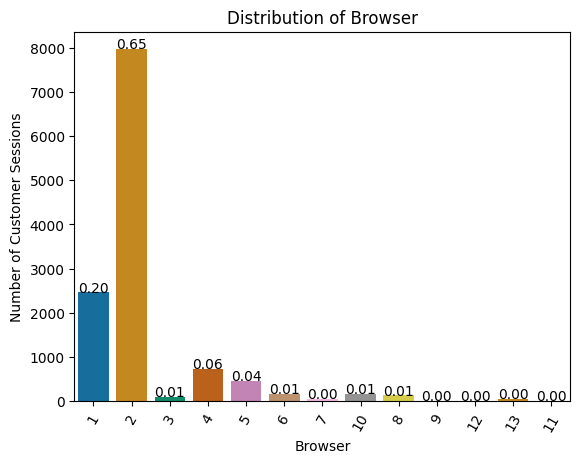

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/1614162406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind')


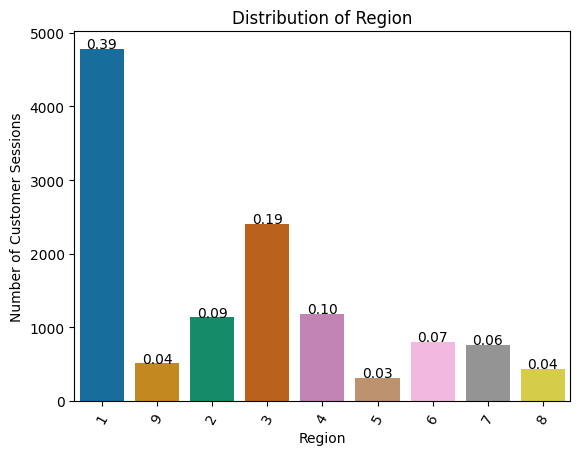

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/1614162406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind')


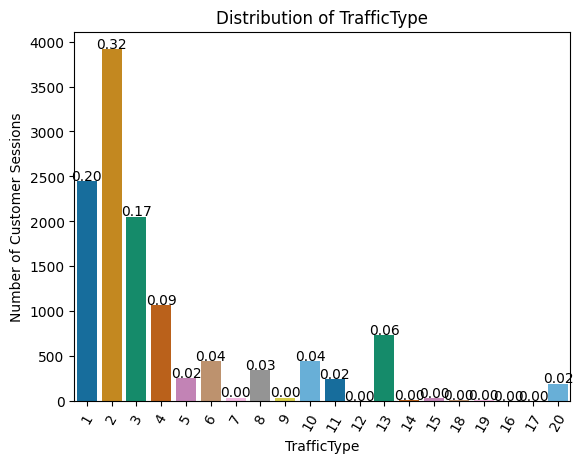

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/1614162406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind')


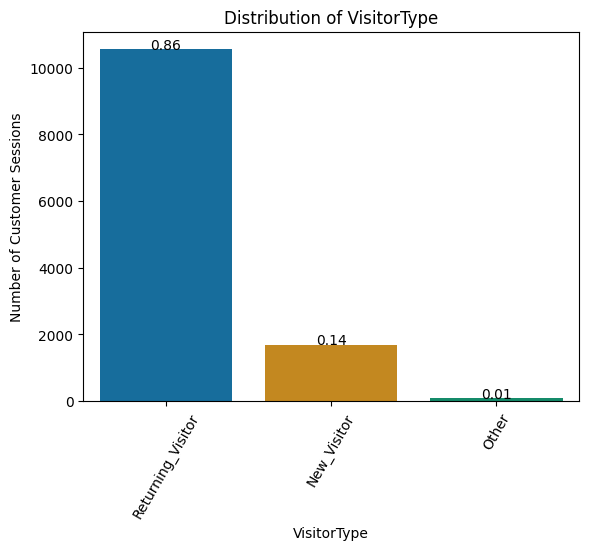

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/1614162406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind')


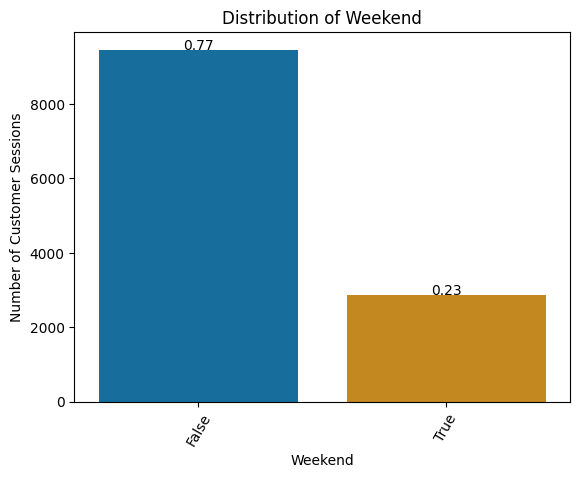

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/1614162406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind')


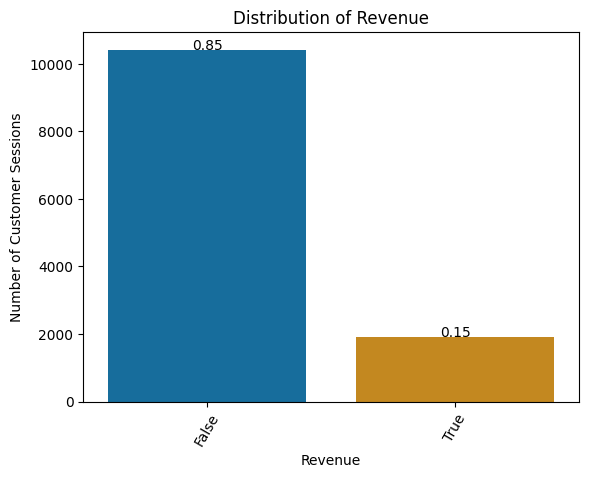

In [26]:
# Plot distributions of categorical variables.
for var in cat_df.columns:
    ax = sns.countplot(x = online_df[var], data = online_df, palette = 'colorblind')
    total = float(len(online_df[var])) 
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 10,
                '{:1.2f}'.format(height/total),
                ha="center")
    plt.title('Distribution of ' + str(var))
    plt.ylabel('Number of Customer Sessions')
    plt.xticks(rotation = 60)
    plt.show()

Most customers shop in the months of May and November and do most of their shopping during the week.  They use operating system 2, browser 2, and use traffic type 2.  They live in region 1 and are returning customers.  Most of the do not purchase anything and are on the website to shop. 

In [27]:
# Print value counts of categorical variables.
for var in cat_df.columns:
    print(online_df[var].value_counts())

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64
Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64
TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64
Weekend
False    9462
True     2868
Na

In [28]:
# Split the numeric variables.
num_df = [f for f in online_df.columns if online_df.dtypes[f] != 'object']

# Create dataframe for numeric variables.
num_df = online_df[num_df]

In [29]:
num_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


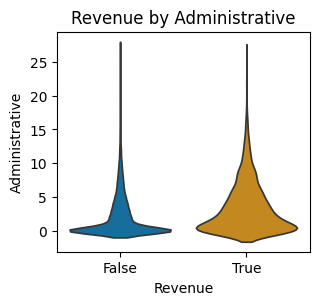

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


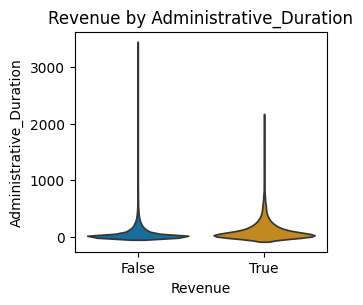

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


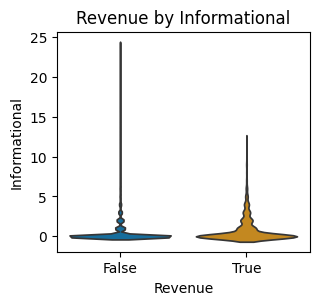

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


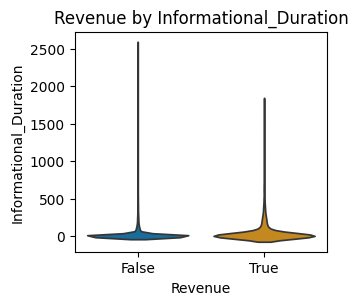

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


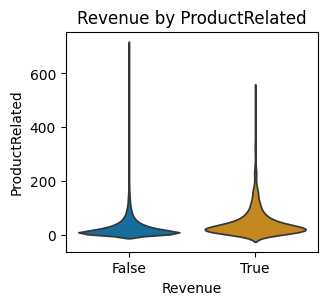

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


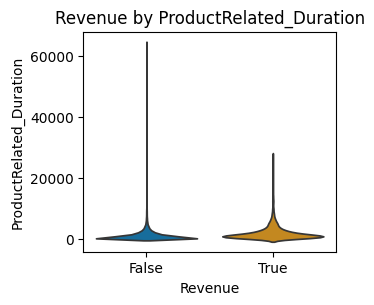

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


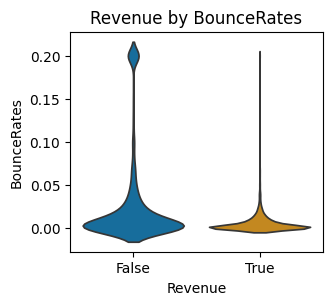

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


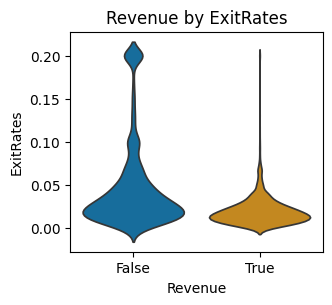

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


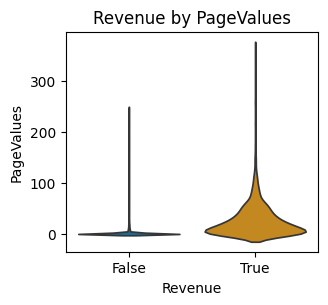

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2260125922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')


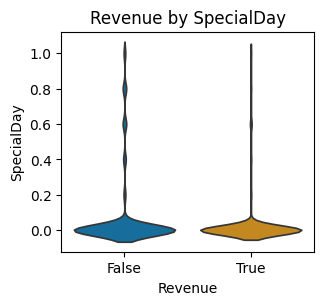

In [30]:
# Check the distributions of the numeric variables using violin plots.
num_all_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

for i in range(len(num_all_columns)):
    plt.figure(figsize=(15, 20))
    plt.subplot(6, 4, i + 1)
    sns.violinplot(x=online_df['Revenue'], y=online_df[num_all_columns[i]], data=online_df, inner=None, palette='colorblind')
    plt.title('Revenue by {}'.format(num_all_columns[i]))
    plt.show()

Insights derived from the violin plots are the higher the number of pages visited the more customers will purchase something.  Another insight is customers who purchased an item have shorter exit rates and bounce rates than those customers that did not purchase an item.  One strategy to keep customers on the website longer is providing items they are interested in purchasing through a recommender system.      

/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2078134282.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[num_all_columns[i]])
/var/folders/_y/htv209717fj8z9xkdgwn573r0000gn/T/ipykernel_25005/2078134282.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df[num

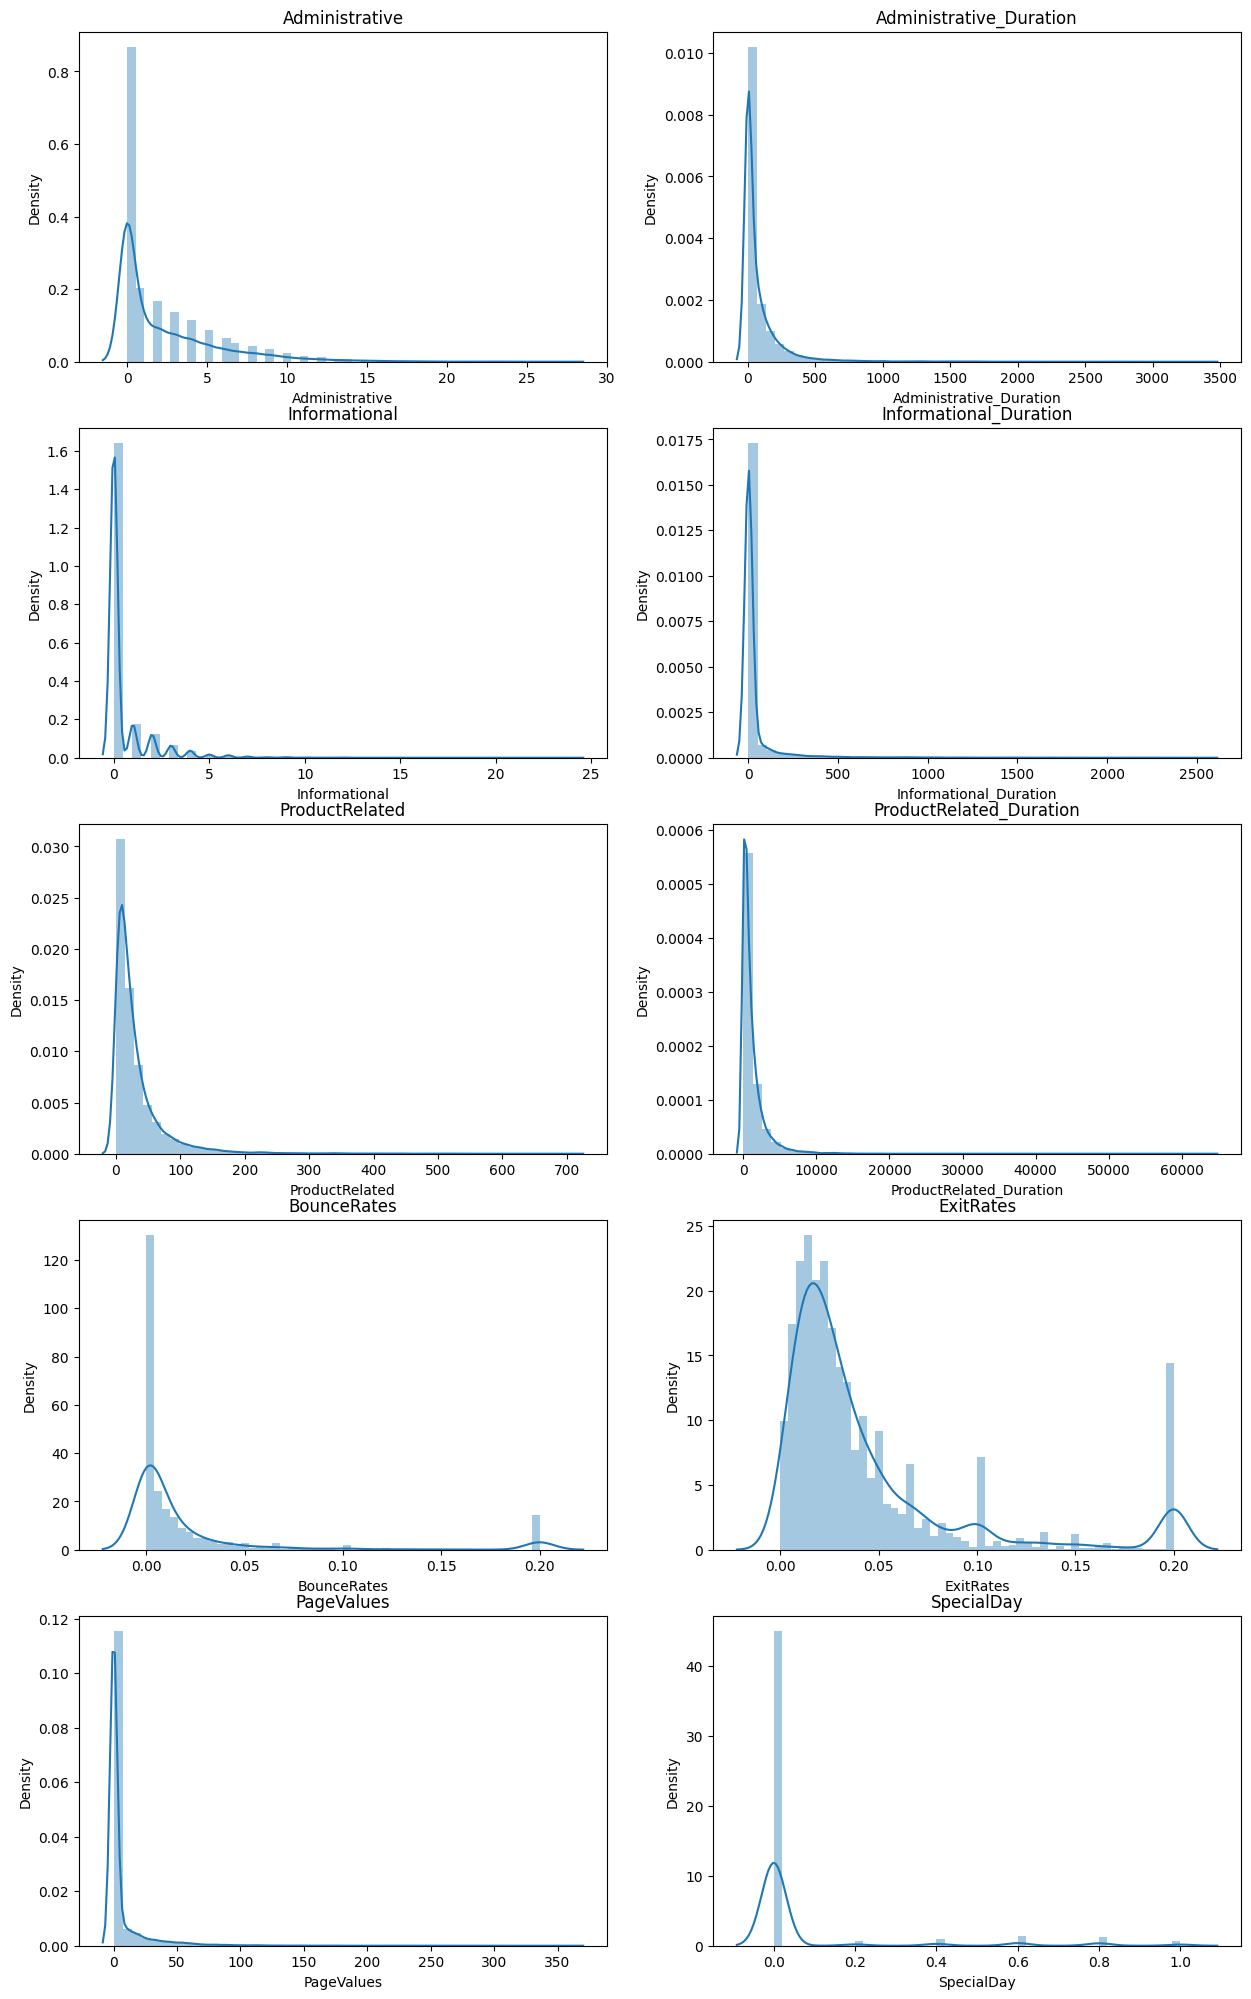

In [31]:
# Check the distributions of the numeric variables.
num_all_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

plt.figure(figsize=(15, 30))

for i in range(len(num_all_columns)):
    plt.subplot(6, 2, i + 1)
    sns.distplot(num_df[num_all_columns[i]])
    plt.title(num_all_columns[i])

I can see many of the distributions are skewed right.  There are possible outliers that I will need to correct for with winsorization.  

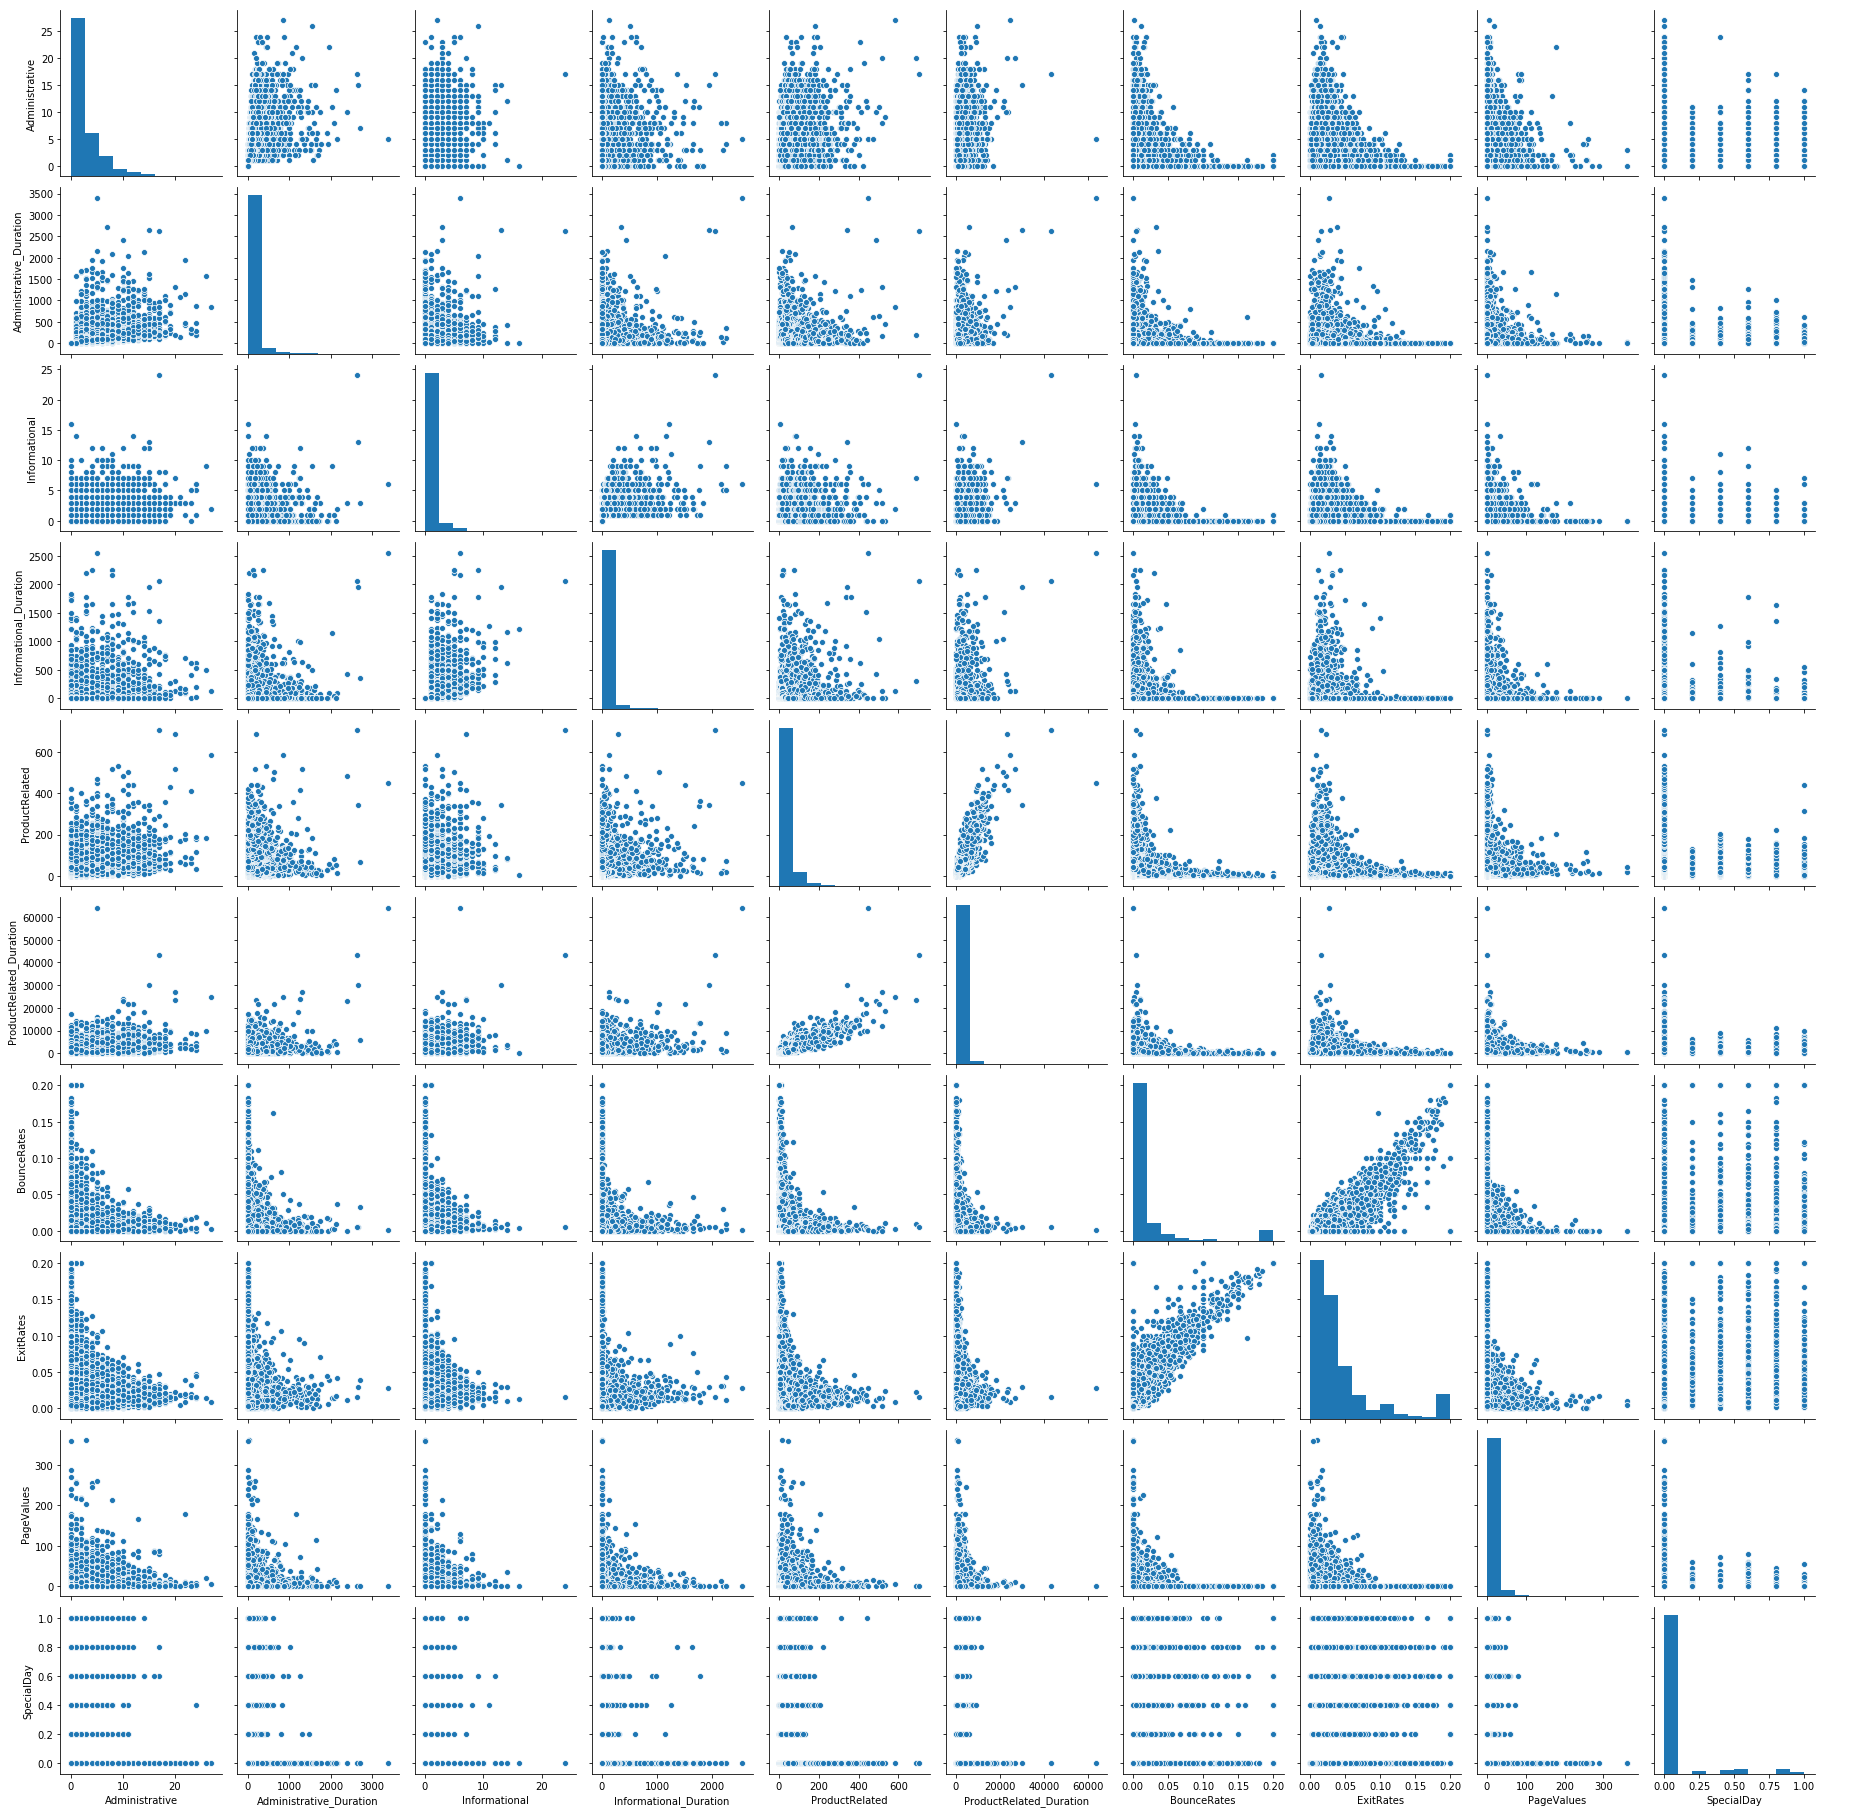

In [ ]:
# Plot pairplots to check see the relationship between the numeric variables.
sns.pairplot(num_df)
plt.show()

I suspect there is multicollinearity based on the scatterplots.  I will verify this with a heatmap of the correlation matrix. 

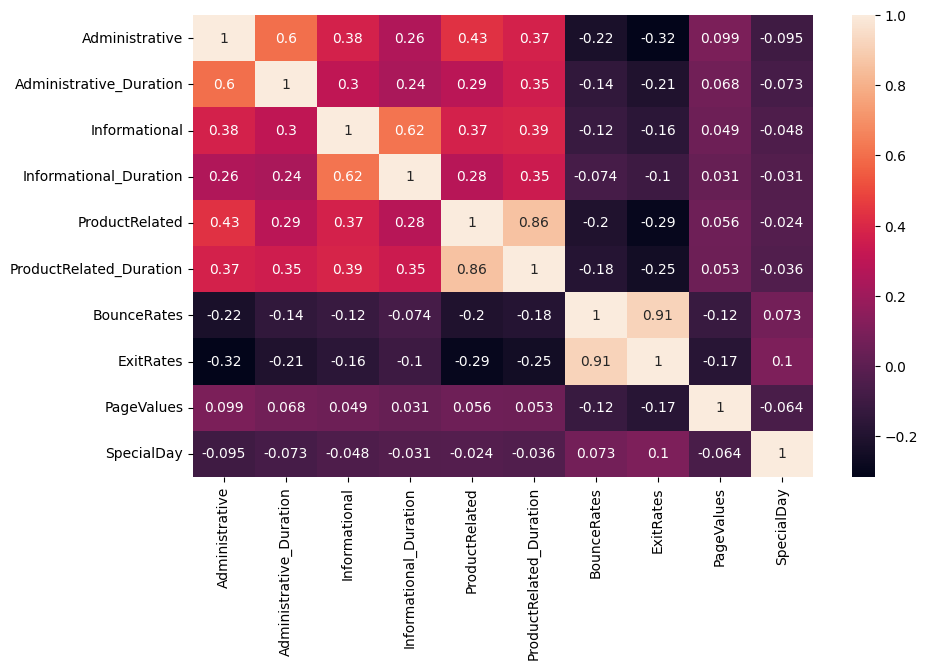

In [33]:
# Check for multicollinearity with a heatmap.
corr_matrix = round(num_df.corr(), 3)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [34]:
# Drop columns because of high correlation to another variable.
new_num_df = num_df.drop(['ProductRelated', 'ExitRates'], 1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

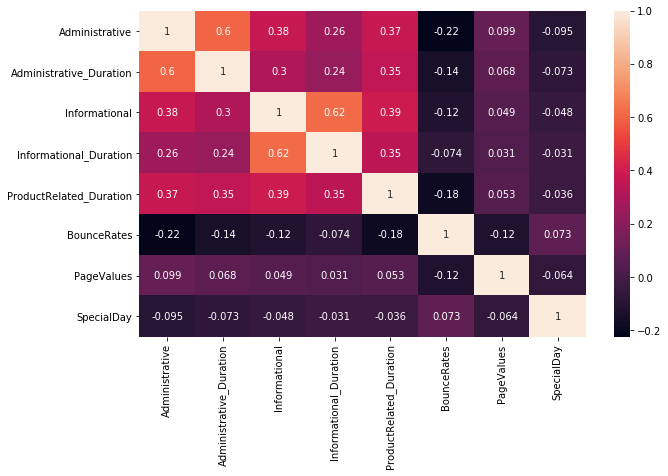

In [ ]:
# Check for multicollinearity with a heatmap after dropping ProductRelated and ExitRates.
new_corr_matrix = round(new_num_df.corr(), 3)

plt.figure(figsize=(10,6))
sns.heatmap(new_corr_matrix, annot=True)
plt.show()

In [ ]:
# Concatenate num_df and cat_df to form online_df.
online_df = pd.concat([new_num_df, cat_df], axis = 1)

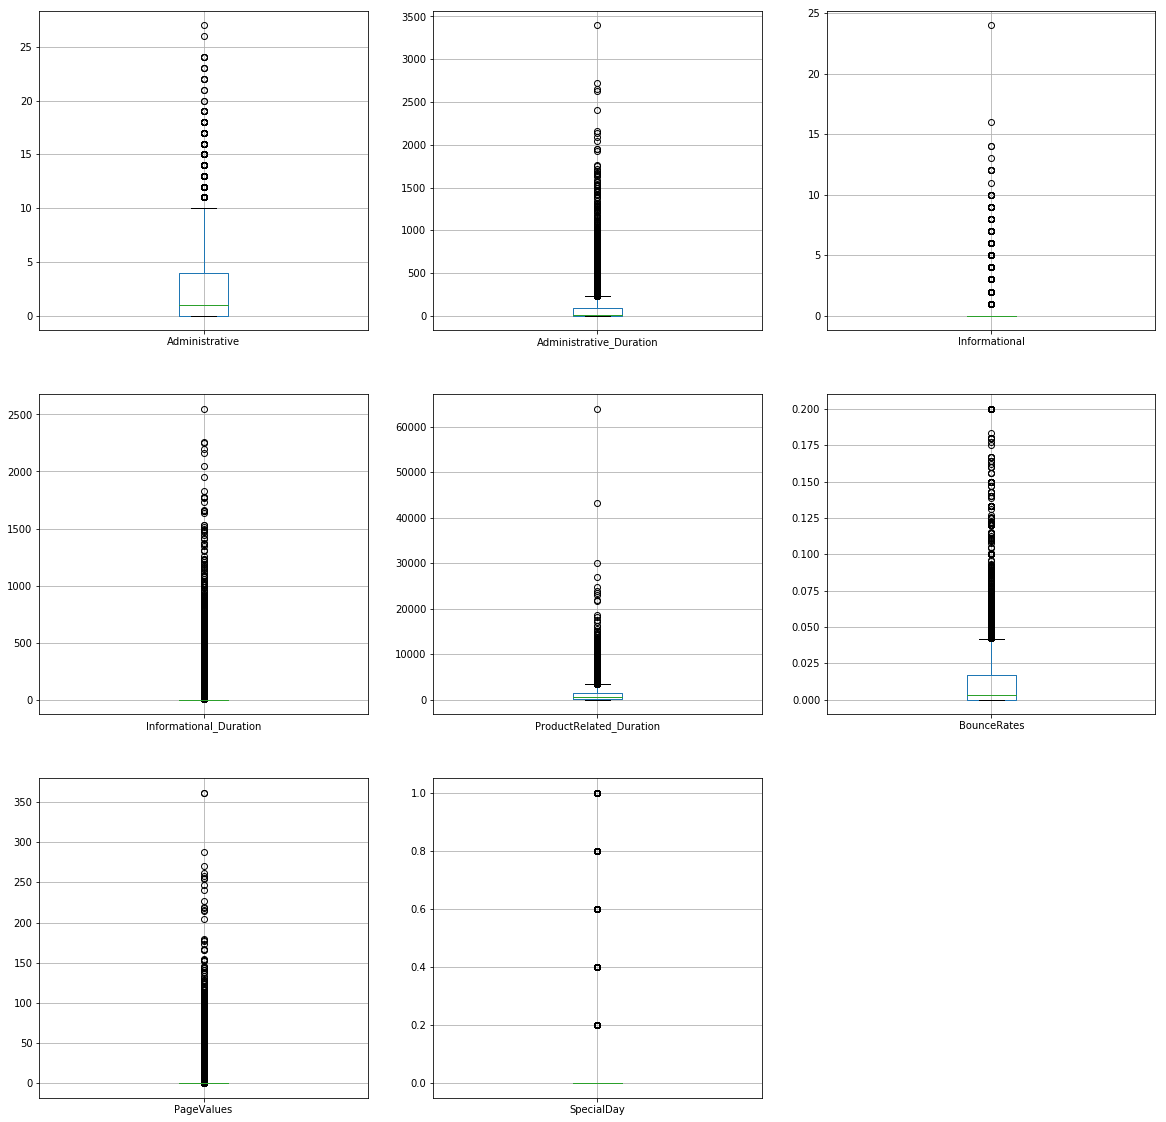

In [ ]:
# Detect outliers through plotting box plots
plt.figure(figsize=(20,20))
for i, col in enumerate(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay'], start=1):
    plt.subplot(3, 3, i)
    num_df.boxplot(col,whis=1.5)
    
plt.show()

In [ ]:
# Calculate number of outliers and its percentage with Tukey's method.
for i, col in enumerate(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay'], start=1):
    q75, q25 = np.percentile(new_num_df[col], [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
                                                                            len((np.where((new_num_df[col] > max_val) | 
                                                                                           (new_num_df[col] < min_val))[0])),
                                                                             len((np.where((new_num_df[col] > max_val) | 
                                                                                           (new_num_df[col] < min_val))[0]))*100/12330))

Number of outliers and percentage of it in Administrative : 404 and 3.276561232765612
Number of outliers and percentage of it in Administrative_Duration : 1172 and 9.505271695052716
Number of outliers and percentage of it in Informational : 2631 and 21.338199513381994
Number of outliers and percentage of it in Informational_Duration : 2405 and 19.505271695052716
Number of outliers and percentage of it in ProductRelated_Duration : 961 and 7.7939983779399835
Number of outliers and percentage of it in BounceRates : 1551 and 12.579075425790755
Number of outliers and percentage of it in PageValues : 2730 and 22.14111922141119
Number of outliers and percentage of it in SpecialDay : 1251 and 10.145985401459853


I can see all eight of the numeric variables have outliers.  I will correct for these outliers with StandardScaler in the preprocessing of data step.

# Data Pre-Processing

In [ ]:
# Define X and y.
y = online_df['Revenue']
X = online_df.drop(['Revenue'], axis=1)

In [ ]:
# Splitting the data into train (80%) and test (20%) data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2, stratify=y)

In [ ]:
# Loading libraries for preprocessing data and creating pipelines.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# Create pipelines to transform numeric and categorical variables.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) 

In [ ]:
# Split data into numeric and categorical variables.
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [ ]:
# Apply transformations to the correct columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Model Selection

In [ ]:
# Load libraries
from pandas import set_option
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.neural_network import MLPClassifier

/home/jupyter/.local/lib/python3.5/site-packages/xgboost/__init__.py:28: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [ ]:
# Create a list classifiers to use pipeline in model selection.
classifiers = [
    LogisticRegression(),
    SVC(kernel='rbf', C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    MLPClassifier()
    ]

In [ ]:
# Create a pipeline for the various classifiers to use for model selection.
# https://www.codementor.io/@bruce3557/beautiful-machine-learning-pipeline-with-scikit-learn-uiqapbxuj
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)
                            ])
    pipe.fit(X_train, y_train)
    print(classifier)
    print('Model score: %.3f' % pipe.score(X_test, y_test))

# Display classification report for all the models for model selection.    
    y_pred = pipe.predict(X_test)
    results = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix: ')
    print(results)
    print('Classification Report: ')
    print(classification_report(y_test, y_pred))

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Model score: 0.888
Confusion Matrix: 
[[2039   45]
 [ 230  152]]
Classification Report: 
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2084
        True       0.77      0.40      0.53       382

    accuracy                           0.89      2466
   macro avg       0.84      0.69      0.73      2466
weighted avg       0.88      0.89      0.87      2466

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Model s

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Model score: 0.885
Confusion Matrix: 
[[1972  112]
 [ 171  211]]
Classification Report: 
              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2084
        True       0.65      0.55      0.60       382

    accuracy                           0.89      2466
   macro avg       0.79      0.75      0.77      2466
weighted avg       0.88      0.89      0.88      2466



Since I am predicting a true or false value for revenue, I considered several classification machine learning models.  The following models I considered were Logistic Regression, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Extreme Gradient Boosting Classifier, Light Gradient Boosting Machine Classifier, and Multi-layer Perceptron Classifier.  I used a machine learning pipeline from scikit learn to display the confusion, accuracy, and classification report for each classifier.  In selecting the model, I used the F1 measure because it is a harmonic mean between precision and recall.  F1 measure accounts for an imbalance in classes of the target variable.  Through this process, I noticed Gradient Boosting Classifier algorithm performed better than all the others with 0.81 macro average. 

# Evaluating Gradient Boosting Classifier.

In [ ]:
# Create a pipeline for the various classifiers to use for model selection.
# https://www.codementor.io/@bruce3557/beautiful-machine-learning-pipeline-with-scikit-learn-uiqapbxuj
gb_clf = GradientBoostingClassifier()
pipe_gb = Pipeline(steps=[('preprocessor', preprocessor),
                       ('gb_clf', GradientBoostingClassifier())
                      ])
pipe_gb.fit(X_train, y_train)
print(gb_clf)
print('Model score: %.3f' % pipe_gb.score(X_test, y_test))

# Display classification report for all the models for model selection.    
y_pred_gb = pipe_gb.predict(X_test)
results_gb = confusion_matrix(y_test, y_pred_gb)
print('Confusion Matrix: ')
print(results_gb)
print('Classification Report: ')
print(classification_report(y_test, y_pred_gb))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Model score: 0.906
Confusion Matrix: 
[[1994   90]
 [ 143  239]]
Classification Report: 
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2084
        True       0.73      0.63      0.67       382

    accuracy                           0.91      2

# Important Features

In [ ]:
num_df = X_train.select_dtypes(include=['int64', 'float64'])
cat_df = X_train.select_dtypes(include=['object'])

In [ ]:
# Encode categorical variables.
dum_cat_df = pd.get_dummies(cat_df)

In [ ]:
# Normalize numerical variables.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_num_df = scaler.fit_transform(num_df)
num_df = pd.DataFrame(scaled_num_df, columns=num_df.columns)

In [ ]:
# Concatenate num_df and cat_df to create X_train
X_train_transform = pd.concat([num_df.reset_index(drop=True), dum_cat_df.reset_index(drop=True)], axis=1)

In [ ]:
# Encode target variable.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode_y_train = le.fit_transform(y_train)
y_train_transform = pd.DataFrame(encode_y_train)

In [ ]:
# Balance the classes of the dataset.
from imblearn.over_sampling import SMOTE
# Fit SMOTE().
sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=100)
X_train_res, y_train_res = sm.fit_resample(X_train_transform, y_train_transform)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


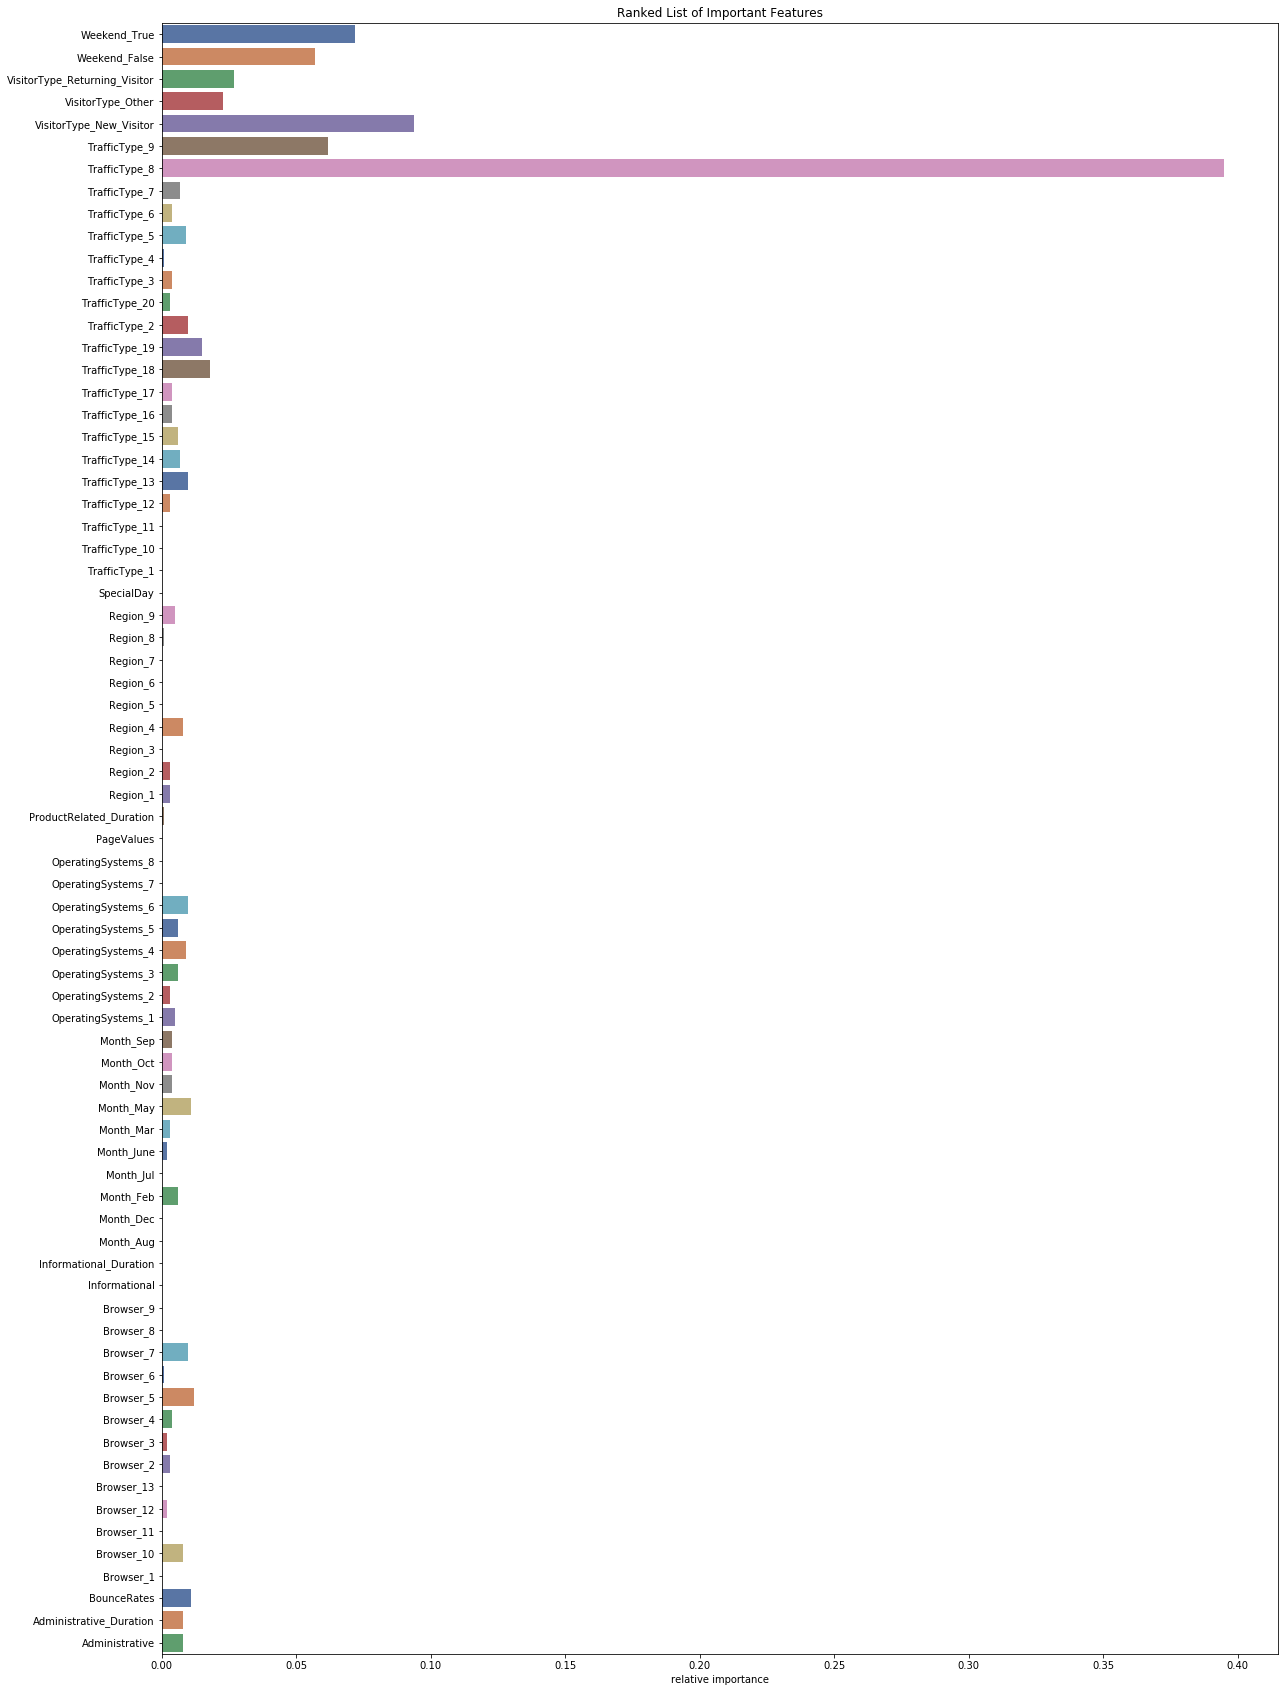

In [ ]:
# List the importantance of the features ranked from the random forest classifier. 
# Initialize the model.
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res)

feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X_train_res.columns.sort_values(ascending = False))

plt.figure(figsize=(20,30))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.title('Ranked List of Important Features')
plt.xlabel('relative importance')
plt.show()

In [ ]:
# List the top 16 features based on relative importance.
imp_features = ser_rank.sort_values(ascending=False)
imp_features[:20]

TrafficType_8                    0.395
VisitorType_New_Visitor          0.094
Weekend_True                     0.072
TrafficType_9                    0.062
Weekend_False                    0.057
VisitorType_Returning_Visitor    0.027
VisitorType_Other                0.023
TrafficType_18                   0.018
TrafficType_19                   0.015
Browser_5                        0.012
BounceRates                      0.011
Month_May                        0.011
OperatingSystems_6               0.010
TrafficType_13                   0.010
TrafficType_2                    0.010
Browser_7                        0.010
TrafficType_5                    0.009
OperatingSystems_4               0.009
Region_4                         0.008
Administrative_Duration          0.008
dtype: float64

# Creating a Simple Flask Application

In [ ]:
# Saving the trained model.
from sklearn.externals import joblib
joblib.dump(pipe_gb, 'gbc_model')

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['gbc_model']

In [ ]:
# Create a simple flask app.
from flask import Flask, request
from flask_restful import Resource, Api
from sklearn.externals import joblib

app = Flask(__name__)
api = Api(app)

class Test_index(Resource):
    def post(self):
        loaded_model = joblib.load('./model/gbc_model')
        test_data = request.get_json()
        input_df = pd.DataFrame([test_data])
        input_df.rename(columns=
                       {'input_TrafficType':'TrafficType', 'input_VistorType':'VistorType', 'input_Weekend':'Weekend'}, inplace=True)
        print(input_df)
        y_train_predict = loaded_model.predict(input_df)
        test_output = pd.DataFrame(y_train_predict, columns={'output'})
        output = test_output.to_dict(orient='list')
        return output

api.add_resource(Test_index, '/test')
if __name__ == '__main__':
    app.run(debug=True)
    